<a href="https://colab.research.google.com/github/salonii1030/GUVI-Task_6/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
model = linear_model.LinearRegression()
X = df[["Ground Temperature"]]
Y = df["Chirps/Second"]
model.fit(X,Y)

LinearRegression()

**1.Find the linear regression equation for this data.**

In [ ]:
print("Linear Regression Equation is: y = {:.4f} x + {:.4f}".format(model.coef_[0],model.intercept_))

Linear Regression Equation is: y = 0.2030 x + 0.4593


**2. Chart the original data and the equation on the chart.**

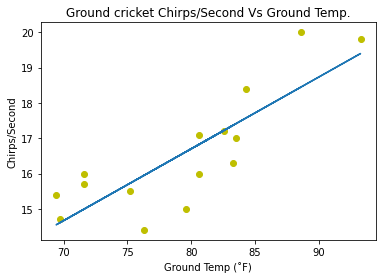

In [ ]:
plt.scatter(X,Y,color = "y")
plt.plot(X,model.predict(X))
plt.title("Ground cricket Chirps/Second Vs Ground Temp.")
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Second')
plt.show()

**3. R2 Score**

In [ ]:
print("R2 Score for equation is : {:.4f}".format(model.score(X,Y)))

R2 Score for equation is : 0.6923


R2 score is 0.6923 which is below 0.8, this is not good fit for data

**4. Extrapolate data**

In [ ]:
print("If the ground temperature reached 95 then chirps/seconds is:",model.predict([[95]]))

If the ground temperature reached 95 then chirps/seconds is: [19.74428913]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**5. Interpolate data**

In [ ]:
tmp = (18 - model.intercept_)/ model.coef_[0]
print("Approximate ground temperature where crickets were chirping at rate of 18 chirps/sec is: {:.4f} ºF".format(tmp))

Approximate ground temperature where crickets were chirping at rate of 18 chirps/sec is: 86.4074 ºF


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df_brain_body = pd.read_fwf("brain_body.txt")

**1. Linear Regression Equation**

In [ ]:
model_brain_body = linear_model.LinearRegression()
bd = df_brain_body[["Body"]]
br = df_brain_body["Brain"]
model_brain_body.fit(bd,br)
print("Linear Regression Equation for brain-body weight is: y = {:.4f} x + {:.4f}".format(model_brain_body.coef_[0],model_brain_body.intercept_))

Linear Regression Equation for brain-body weight is: y = 0.9029 x + -56.8555


**2. Chart** 

Text(0, 0.5, 'Brain Weight')

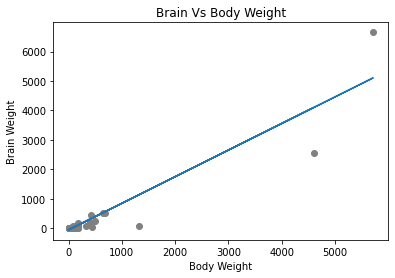

In [ ]:
plt.scatter(bd,br,color = "grey")
plt.plot(bd,model_brain_body.predict(bd))
plt.title("Brain Vs Body Weight")
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")

**3. R2 Score**

In [ ]:
print("R2 Score for Equation is: {:.4f}".format(model_brain_body.score(bd,br)))

R2 Score for Equation is: 0.8727


Here R2 Score is greater than 0.8, that it is good fit for data

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df_salary = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df_salary

In [ ]:
X = df_salary.iloc[: , :5]
Y = df_salary.iloc[: ,-1:]

In [ ]:
X

In [ ]:
Y

**1. Linear regression equation**

In [ ]:
model_salary = linear_model.LinearRegression()
model_salary.fit(X,Y)
cf = model_salary.coef_[0]
icpt = model_salary.intercept_
print("Linear Regression Equation for Salary Data is: {}  + {}".format(cf,icpt))

Linear Regression Equation for Salary Data is: [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]  + [11410.14654726]


In [ ]:
print("R2 Score is: ",model_salary.score(X,Y))

R2 Score is:  0.8547180674410969


**2. Find the selection of columns with the best  R2  score**

In [ ]:
salary_col = ["Sex", "Rank", "Year", "Degree", "YSdeg"]
def reg_comb(salary_col,df,r = "Salary"):
  inp_col = df[salary_col]
  r_op = df[r]
  model1 = linear_model.LinearRegression()
  model1.fit(inp_col,r_op)
  return model1.score(inp_col,r_op)


In [ ]:
import itertools as it
def combi(cols):
  return[it.combinations(cols,n+1) for n in range(len(cols))]

In [ ]:
cmb = combi(salary_col) 

In [ ]:
def all_score(cmb,df,focus = "Salary"):
  combo_scores = {}
  for i in range(len(list(cmb))):
    for j in list(cmb[i]):
      combo_scores[reg_comb(list(j),df,focus)] = j
  return combo_scores

In [ ]:
combo_scores = all_score(cmb,df_salary)
sorted(combo_scores.items(),key=lambda c: c[0],reverse = True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

The best R2 score is given by ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg') columns which is 0.8547180674410969 but only two columns i.e. ('Year','Rank') also gives better R2 score i.e. 0.8436480933264597.

3. Report whether sex is a factor in salary

As seen above "Sex" on its own has a score very close to zero i.e.(0.06389892583288004) saying that it has no direct effect on salary.